In [1]:
import numpy as np
from scipy import interpolate
import matplotlib.pyplot as plt
import random
from scipy.interpolate import make_interp_spline

In [2]:
x = [3, 6, 9, 12, 15, 18, 21, 24,27, 30, 33]
y = [1.18, 2.47, 2.97, 3.67, 3.84, 4.58, 5.3, 8.15, 10.48, 15.3, 18.22]
z= [2.48, 2.94, 3.24, 5.84, 7.86, 12.04, 14.3, 19.94, 22.14, 27.52, 29.94]

In [3]:
x = [12, 15, 18, 21, 24,27, 30, 33]
y = [3.67, 3.84, 4.58, 5.3, 8.15, 10.48, 15.3, 18.22]
z= [5.84, 7.86, 12.04, 14.3, 19.94, 22.14, 27.52, 29.94]

In [4]:
xnew = np.arange(12, 33, 2)
xnew

array([12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32])

In [441]:
# x = [128, 144, 160, 176, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 224]
# y = [1.77, 2.35, 3.84, 9.17, 19.86, 22.18, 26.38, 28.48, 33.27, 35.77, 41.9, 46.1, 54.77, 58.73, 66.33, 71.14]
# z = [2.1, 3.3, 5.46, 8.54, 17.92, 20.08, 25.88, 28.52, 37.32, 42.24, 49.82, 54.78, 64.24, 69.22, 77, 83.28]

In [487]:
x = [211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 224]
y = [19.86, 22.18, 26.38, 28.48, 33.27, 35.77, 41.9, 46.1, 54.77, 58.73, 66.33, 71.14]
z = [17.92, 20.08, 25.88, 28.52, 37.32, 42.24, 49.82, 54.78, 64.24, 69.22, 77, 83.28]

In [488]:
xnew = np.arange(211, 224, 0.5)
xnew

array([211. , 211.5, 212. , 212.5, 213. , 213.5, 214. , 214.5, 215. ,
       215.5, 216. , 216.5, 217. , 217.5, 218. , 218.5, 219. , 219.5,
       220. , 220.5, 221. , 221.5, 222. , 222.5, 223. , 223.5])

In [5]:
func = interpolate.interp1d(x, y, kind='linear')
ynew = func(xnew)
ynew

array([ 3.67      ,  3.78333333,  4.08666667,  4.58      ,  5.06      ,
        6.25      ,  8.15      ,  9.70333333, 12.08666667, 15.3       ,
       17.24666667])

In [6]:
func = interpolate.interp1d(x, z, kind='linear')
znew = func(xnew)
znew

array([ 5.84      ,  7.18666667,  9.25333333, 12.04      , 13.54666667,
       16.18      , 19.94      , 21.40666667, 23.93333333, 27.52      ,
       29.13333333])

In [7]:
# plt.plot(x, y,z, 'ro-')

In [8]:
# plt.plot(xnew, ynew, znew)

In [9]:
# plt.show()

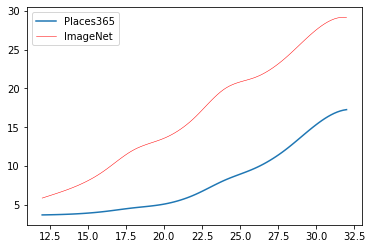

In [10]:
x_smooth = np.linspace(xnew.min(), xnew.max(), 100)
y_smooth = make_interp_spline(xnew, ynew)(x_smooth)
z_smooth = make_interp_spline(xnew, znew)(x_smooth)

l1,=plt.plot(x_smooth,y_smooth,label='Places365')
l2,=plt.plot(x_smooth,z_smooth,color='red',linewidth=.5,label='ImageNet')

# plt.ylim([0, 100])

plt.legend(handles=[l1, l2])
plt.savefig('low.png')

In [11]:
slope_Y = np.diff(ynew)/np.diff(xnew)
slope_Z = np.diff(znew)/np.diff(xnew)

x_smooth = np.linspace(xnew.min(), xnew.max(), 500)
y_smooth = make_interp_spline(xnew[:-1], slope_Y)(x_smooth)
z_smooth = make_interp_spline(xnew[:-1], slope_Z)(x_smooth)

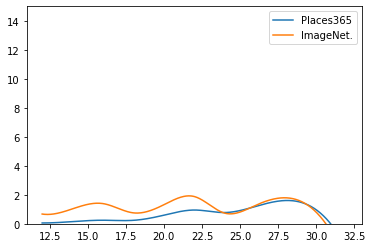

In [12]:
l3, = plt.plot(x_smooth, y_smooth, label='Places365')
l4, = plt.plot(x_smooth, z_smooth, label='ImageNet.')

plt.ylim([0, 15])
plt.legend(handles=[l3, l4])
plt.savefig('high_d.png')